<a href="https://colab.research.google.com/github/kartikeygupta547/cognitive-computing/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).

1. Convert text to lowercase and remove punctuaƟon using re.

2. Tokenize the text into words and sentences.

3. Split using split() and word_tokenize() and compare how Python split and
NLTK’s
word_tokenize() differ.

4. Remove stopwords (using NLTK's stopwords list).

5. Display word frequency distribuƟon (excluding stopwords).

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

text = "Technology is evolving every day, bringing new innovations. Artificial Intelligence and Machine Learning are changing the way we interact with machines. Smartphones and smart homes have become a part of daily life. Technology also helps in improving healthcare and education. It connects people globally, making communication faster and easier. The future holds even more exciting possibilities in this field."

text_lower = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_lower)

words = word_tokenize(text_clean)
sentences = sent_tokenize(text_clean)

split_words = text_clean.split()
tokenized_words = word_tokenize(text_clean)

print("Split words:", split_words)
print("Tokenized words:", tokenized_words)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

freq_dist = Counter(filtered_words)
print("Word Frequency Distribution:")
print(freq_dist)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Split words: ['technology', 'is', 'evolving', 'every', 'day', 'bringing', 'new', 'innovations', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'are', 'changing', 'the', 'way', 'we', 'interact', 'with', 'machines', 'smartphones', 'and', 'smart', 'homes', 'have', 'become', 'a', 'part', 'of', 'daily', 'life', 'technology', 'also', 'helps', 'in', 'improving', 'healthcare', 'and', 'education', 'it', 'connects', 'people', 'globally', 'making', 'communication', 'faster', 'and', 'easier', 'the', 'future', 'holds', 'even', 'more', 'exciting', 'possibilities', 'in', 'this', 'field']
Tokenized words: ['technology', 'is', 'evolving', 'every', 'day', 'bringing', 'new', 'innovations', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'are', 'changing', 'the', 'way', 'we', 'interact', 'with', 'machines', 'smartphones', 'and', 'smart', 'homes', 'have', 'become', 'a', 'part', 'of', 'daily', 'life', 'technology', 'also', 'helps', 'in', 'improving', 'healthcare', 'and', 'education'

Q2. Using the same paragraph from Q1:

1. Extract all words with only alphabets using re.findall()

2. Remove stop words using NLTK’s stopword list

3. Perform stemming with PorterStemmer

4. Perform lemmaƟzaƟon with WordNetLemmaƟzer

5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
paragraph = "Your paragraph goes here. Replace this with the text from Q1."

words = re.findall(r'[a-zA-Z]+', paragraph)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed Words: ['paragraph', 'goe', 'replac', 'text', 'q']
Lemmatized Words: ['paragraph', 'go', 'Replace', 'text', 'Q']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

1. Use CountVectorizer to generate the Bag of Words representaƟon.

2. Use TfidfVectorizer to compute TF-IDF scores.

3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The new smartphone has amazing features and a sleek design.",
    "This product is the best value for the money I have spent so far.",
    "Customer service was terrible, and I will not recommend this to anyone."
]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(texts)
print(count_matrix.toarray())
print(count_vectorizer.get_feature_names_out())

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
print(tfidf_matrix.toarray())

for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    top_indices = np.argsort(tfidf_scores)[-3:][::-1]
    top_keywords = [(tfidf_vectorizer.get_feature_names_out()[index], tfidf_scores[index]) for index in top_indices]
    print(top_keywords)


[[1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 2 1 0 1 0 0]
 [0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1]]
['amazing' 'and' 'anyone' 'best' 'customer' 'design' 'far' 'features'
 'for' 'has' 'have' 'is' 'money' 'new' 'not' 'product' 'recommend'
 'service' 'sleek' 'smartphone' 'so' 'spent' 'terrible' 'the' 'this' 'to'
 'value' 'was' 'will']
[[0.35013871 0.26628951 0.         0.         0.         0.35013871
  0.         0.35013871 0.         0.35013871 0.         0.
  0.         0.35013871 0.         0.         0.         0.
  0.35013871 0.35013871 0.         0.         0.         0.26628951
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.27850943 0.         0.
  0.27850943 0.         0.27850943 0.         0.27850943 0.27850943
  0.27850943 0.         0.         0.27850943 0.         0.
  0.         0.         0.27850943 0.27850943 0.         0.42362719
  0.2118136 

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.

2. Calculate:

a. Jaccard Similarity using sets

b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

c. Analyze which similarity metric gives beƩer insights in your case.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    return set(tokens), tokens

text1 = "Artificial Intelligence enables machines to mimic human intelligence for tasks like decision-making."
text2 = "Blockchain is a decentralized ledger technology that ensures secure and transparent transactions."

set1, tokens1 = preprocess(text1)
set2, tokens2 = preprocess(text2)

jaccard_similarity = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard_similarity)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print("Cosine Similarity:", cosine_sim)


Jaccard Similarity: 0.0
Cosine Similarity: 0.0


Q5. Write a short review for a product or service.

1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.

2. Classify reviews into PosiƟve / NegaƟve / Neutral.

3. Create a word cloud using the wordcloud library for all posiƟve reviews.

Sentiment Analysis Results:
Review: The smartphone is incredibly fast and has an amazing camera.
Polarity: 0.4, Subjectivity: 0.75, Classification: Positive

Review: Battery life is disappointing and it heats up quickly.
Polarity: -0.13333333333333333, Subjectivity: 0.6, Classification: Negative

Review: Overall, the product delivers good value for the price.
Polarity: 0.35, Subjectivity: 0.30000000000000004, Classification: Positive

Review: Customer service was rude and unhelpful.
Polarity: -0.3, Subjectivity: 0.6, Classification: Negative

Review: I love the sleek design and vibrant display of this device.
Polarity: 0.3333333333333333, Subjectivity: 0.4666666666666667, Classification: Positive



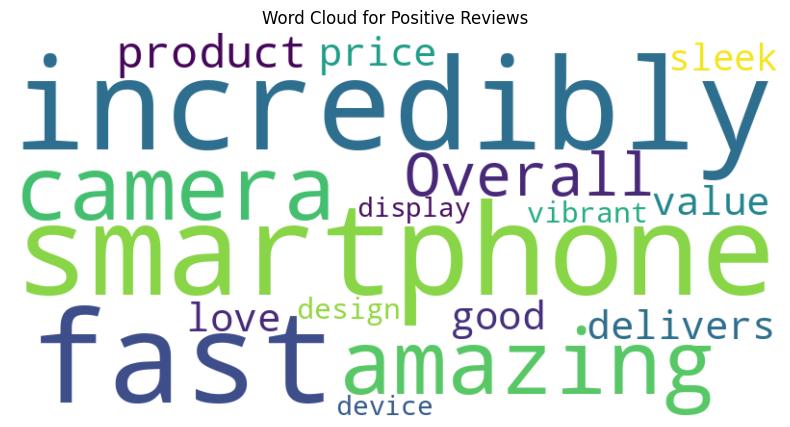

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "The smartphone is incredibly fast and has an amazing camera.",
    "Battery life is disappointing and it heats up quickly.",
    "Overall, the product delivers good value for the price.",
    "Customer service was rude and unhelpful.",
    "I love the sleek design and vibrant display of this device."
]

sentiments = []
positive_reviews = []

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    classification = (
        "Positive" if polarity > 0.1 else
        "Negative" if polarity < -0.1 else
        "Neutral"
    )
    sentiments.append((review, polarity, subjectivity, classification))
    if classification == "Positive":
        positive_reviews.append(review)

print("Sentiment Analysis Results:")
for review, polarity, subjectivity, classification in sentiments:
    print(f"Review: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}, Classification: {classification}\n")

if positive_reviews:
    wordcloud_text = " ".join(positive_reviews)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(wordcloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews")
    plt.show()


Q6. Choose your own paragraph (~100 words) as training data.

1. Tokenize text using Tokenizer() from keras.preprocessing.text

2. Create input sequences and build a simple LSTM or Dense model

3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

paragraph = (
    "Artificial Intelligence has revolutionized technology. "
    "From autonomous cars to personalized recommendations, AI is shaping the future. "
    "Its potential to transform industries is unparalleled."
)

seed_word = "Artificial"
vocab_size = 10000
max_sequence_length = 10
embedding_dim = 50

# Tokenize text
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in paragraph.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_sequence_length - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=50, verbose=1)

# Generate text
def generate_text(seed, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0).argmax(axis=1)[0]
        seed += ' ' + tokenizer.index_word[predicted]
    return seed

new_text = generate_text(seed_word, 10)
print(new_text)